In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#Leemos nuestro dataset que esta en un archivo xlsx que paso el cliente
dfVentasComple = pd.read_excel('../Ventas Mar-Ago.xlsx')

#hacemos drop de unas columnas que comentaron que no son necesarias agregar en lo mas minimo creando una array de las columnas a eliminar
dropColumns = ['SKU','Código de Barras','Lote','Caducidad del Lote','Estado','Entrega','Cajero','Vendedor','Caja','Sucursal','Canal']
dfVentasComple = dfVentasComple.drop(columns=dropColumns).reset_index()

#Ahora estandarizamos los datos de la fecha de las ventas del cliente pasandolo de un string a un formato de fecha
dfVentasComple['Fecha'] = pd.to_datetime(dfVentasComple['Fecha'])

#Aplicamos el redondeo a los valores de las columnas dejandolo solo en 2 decimales
dfVentasComple['Descuento'] = dfVentasComple['Descuento'].round(2)
dfVentasComple['Margen'] = dfVentasComple['Margen'].round(2)
dfVentasComple['Total'] = dfVentasComple['Total'].round(2)

#Cambiamos el nombre de una columna ya que no se entendia muy bien ya que es precio unitario es decir precio por cada pieza
dfVentasComple = dfVentasComple.rename(columns={'Precio Unitario': 'Precio de Venta'})

#Igualmente creamos 2 nuevas columnas dentro de nuestro set de datos el cual tendra el mes y año de la fecha de la venta que se realizo esto
#para un analisis todavia mas profundo de los datos.
dfVentasComple['Mes'] = dfVentasComple['Fecha'].dt.month
dfVentasComple['Año'] = dfVentasComple['Fecha'].dt.year

#En otro dataframe almacenamos los productos que sean de envio ya que esos no se tomaran para el analisis de las ventas si no como gastos
dfEnvios = dfVentasComple[dfVentasComple['Producto'] == 'Envio'].reset_index()

#Ahora ya que sacamos los envios en el mismo dataframe solo obtenemos las ventas que no sean envios para su analisis
dfVentasComple = dfVentasComple[dfVentasComple['Producto'] != 'Envio'].sort_values(by= 'Fecha', ascending = True).reset_index(drop=True)

#Obtenemos un valor que dentro de el set de datos que no estaba, este es el costo unitario por producto es decir lo que le cuesta cada
#producto unitariamente ya que el set de datos lo tiene todo junto
dfVentasComple['Costo Unitario'] = dfVentasComple['Costo'] / dfVentasComple['Cantidad']

#Reordenamos todo nuestro DF principal de las ventas para su mejor manipulacion y visualizacion
dfVentasComple = dfVentasComple[["index", "Número de Venta", "Fecha", "Mes", "Año", "Producto", "Categoria", "Marca",
         "Costo Unitario", "Cantidad", "Costo", "Subtotal", "Descuento",
         "Total", "Margen", "Cliente"]]

#Obtenemos un nuevo dataframe a peticion del cliente quitando las categorias suplementos (ya que estos son genericos y no les interesa saber su analisis)
#son propios de maquila solo interes suplementacion Americana (de importacion)
#este nuevo dataframe agrupado por año, mes y la CATEGORIA, sumando los valores de la cantidad, total y margen de cada una de las categoria diferentes del DF
#ordenado por la categoria y el mes de venta de forma ascendente cada una
dfVentasCategoriaMensual = dfVentasComple[dfVentasComple['Categoria'] != 'Suplementos']
dfVentasCategoriaMensual = (dfVentasCategoriaMensual.groupby(['Año','Mes','Categoria'])[['Cantidad','Total','Margen']].sum()
    .sort_values(by= ['Categoria','Mes'], ascending = [True,True])
    .reset_index())

#De nuestro DF de ventas por Categoria mensuales, lo ordenamos por año de menor a mayor, mes de mayor a menor y de Margen de mayor a menor, posteriormente
#agrupandolo por año y mes para poder obtener los primeros 3 registros es decir apoyados por el filtro las primeras 3 CATEGORIAS con mayor MARGEN de
#cada uno de los meses
dfTop3CategoriasGananciasMes = (dfVentasCategoriaMensual.sort_values(["Año","Mes","Margen"], ascending=[True,True,False])
    .groupby(["Año","Mes"]).head(3).reset_index(drop=True))

#Normalizamos a solo tener 2 decimales en el margen
dfTop3CategoriasGananciasMes['Margen'] = dfTop3CategoriasGananciasMes['Margen'].round(2)
dfTop3CategoriasGananciasMes

C:\Users\CESAR\AppData\Local\Temp\ipykernel_27444\2220876003.py:14: UserWarning:

Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



,Año,Mes,Categoria,Cantidad,Total,Margen
0,2025,3,Ashwagandha,59,14614.23,4714.23
1,2025,3,Electrolitos,13,5211.03,1641.03
2,2025,3,Precursores de Testosterona,26,6380.00,1512.00
3,2025,4,Ashwagandha,96,21060.00,9060.00
4,2025,4,Cafeina Anhidra,19,7655.00,1900.00
5,2025,4,BCAA,12,5825.00,1535.00
6,2025,5,Ashwagandha,81,19006.84,7306.84
7,2025,5,Colageno,16,14595.00,2240.00
8,2025,5,HMB,15,6200.00,1905.00
9,2025,6,Ashwagandha,25,8420.00,4455.00


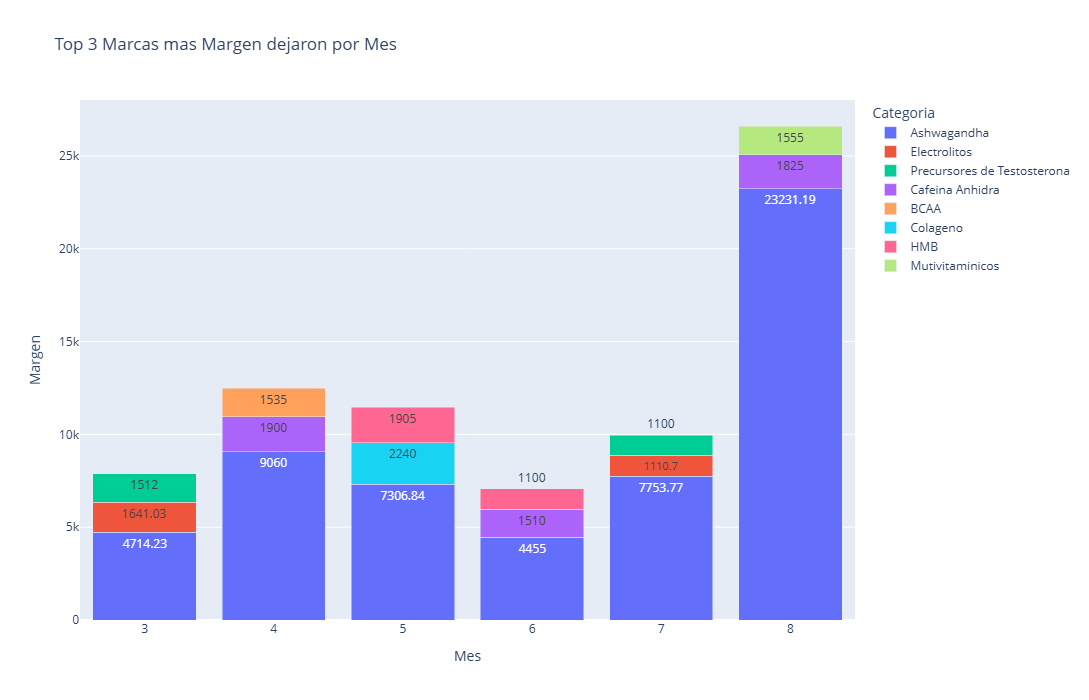

In [4]:
fig = px.bar(dfTop3CategoriasGananciasMes, x='Mes', y='Margen', color='Categoria',
             title="Top 3 Marcas mas Margen dejaron por Mes",text='Margen', height=700)
fig.update_layout(barmode='stack')
fig.show()